In [1]:
import json
import pandas as pd
import numpy as np  
import os 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Start with loading all necessary libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', None)

# 0. Load data 

In [86]:
# create paths 
path = '../../data'
path_audio_feats = os.path.join(path, 'audio_features.tsv')
path_playlists = os.path.join(path, 'playlists.tsv')
path_tracks = os.path.join(path, 'tracks.tsv')

In [87]:
# read data from file
pd_audio_feats = pd.read_csv(path_audio_feats, sep = '\t')
pd_tracks = pd.read_csv(path_tracks, sep = '\t')
pd_playlists = pd.read_csv(path_playlists, sep = '\t')

In [88]:
# print shape of these playlists
pd_playlists.shape, pd_tracks.shape, pd_audio_feats.shape

((1412, 5), (86432, 9), (68577, 14))

Ta sẽ kiểm tra các thông tin cơ bản trong các dataframe vừa được load lên ở trên 

## a. Playlist dataframe

In [89]:
pd_playlists.head(10)

,playlist_id,playlist_name,description,num_tracks,num_followers
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
1,37i9dQZF1DX0XUsuxWHRQd,Today's Top Hits,"New music from Jack Harlow, Juice WRLD and Kid Cudi.",50,13537247
2,37i9dQZF1DX1lVhptIYRda,RapCaviar,"Today's top country hits of the week, worldwide! Cover: Eric Church",53,6189727
3,37i9dQZF1DX10zKzsJ2jva,RapCaviar,"Today's top Latin hits are right here, on ¡Viva Latino! Cover: Danny Ocean",50,10763311
4,37i9dQZF1DX4JAvHpjipBk,Hot Country,"New albums from Taylor Swift, Jack Harlow, Kid Cudi, and more!",100,3694201
5,37i9dQZF1DX4sWSpwq3LiO,Hot Country,Relax and indulge with beautiful piano pieces,302,6082527
6,37i9dQZF1DX4SBhb3fqCJd,¡Viva Latino!,The pulse of R&B music today. Cover: Ari Lennox,33,5451493
7,37i9dQZF1DWXRqgorJj26U,¡Viva Latino!,Rock legends and epic songs that continue to inspire generations.,145,8620894
8,37i9dQZF1DX4dyzvuaRJ0n,New Music Friday,"The world's biggest dance hits. Music from SG Lewis & Rhye, Anabel Englund, David Guetta and more!",80,5556760
9,37i9dQZF1DXcF6B6QPhFDv,New Music Friday,The newest music from grandson along with the top Rock songs you need to know,50,4492713


In [90]:
pd_playlists.tail(10)

,playlist_id,playlist_name,description,num_tracks,num_followers
1402,73boXMJz9iBoXxQVFZ94r5,The official Bråvalla Festival playlist 2017,"If you travel the world and the seven seas, cashing six figure checks in all currencies, this playlist is a perfect companion for that business class seat or limo ride...",23,18811
1403,2y74Ha0ztRUcIYmqITh0D4,The official Bråvalla Festival playlist 2017,NaN,25,17
1404,1k9jG0FUp7BcrAF1MZSabO,International Playboy,NaN,20,28
1405,37i9dQZF1DX2L0iB23Enbq,International Playboy,"Viral, trending and taking off.",129,1402883
1406,37i9dQZF1DWVmps5U8gHNv,National Blood Week,"A collection of classics from the height of the folk revival to the rise of the folk rock era. Cover: <a href=""spotify:artist:74ASZWbe4lXaubB36ztrGX"">Bob Dylan</a>",115,477489
1407,37i9dQZF1DX3WvGXE8FqYX,National Blood Week,Kick back with the queens of pop.,70,2015059
1408,5ji4GZJpll6twskFvKxiHx,Most Listened To British Dads on Spotify,NaN,50,14
1409,40VxbK9NqccdUDUpiUXmbp,Most Listened To British Dads on Spotify,NaN,30,7
1410,0RTz1jFo5BXGPfI8eVf8sj,Viral Hits,NaN,100,57
1411,4lgseztVwmKQ8MNETPVIny,Viral Hits,NaN,25,124


Ý nghĩa các trường trong playlist dataframe

| Tên cột | Ý nghĩa | 
| --- | --- |
| playlist_id | Giá trị ID unique ứng với playlist | 
| playlist_name | Tên của playlist | 
| description | Chuỗi mô tả playlist |
| num_tracks | Số lượng bài hát có trong playlist |
| num_followers | Số người theo dõi playlist | 

**Nhận xét**: ta thấy tên playlists bị trùng nhau khá nhiều, thoạt nhìn có vẻ dữ liệu thu được bị nhiễu. Tuy nhiên, nếu để ý thì ID, num_tracks và num_followers của chúng không giống nhau, nên những playlist trùng tên này là những playlist *khác nhau*.

In [91]:
# check datatype of each column (we can see that all of them are of the correct type)
pd_playlists.dtypes

playlist_id      object
playlist_name    object
description      object
num_tracks        int64
num_followers     int64
dtype: object

In [92]:
# calculate statistics of numeral columns
pd_playlists[['num_tracks', 'num_followers']].describe()

,num_tracks,num_followers
count,1412.000000,1.412000e+03
mean,72.672805,5.323022e+05
std,58.808214,1.356132e+06
min,0.000000,6.000000e+00
25%,42.750000,5.630000e+03
50%,55.000000,1.191595e+05
75%,94.000000,5.046452e+05
max,851.000000,2.708423e+07


**Nhận xét**: dễ dàng nhận thấy trong tập các playlist, có những playlist không chứa bài hát nào cả, ta sẽ xem đó là những playlist nào 

In [93]:
pd_playlists[pd_playlists['num_tracks'] == 0]

,playlist_id,playlist_name,description,num_tracks,num_followers
466,0NaXa68Xyo4wmMiun5Lqgm,Covered in Country,Turn your commute into a karaoke party. Stay tuned for the next edition. This time: Rock Ballads.,0,171
607,0dVRyMERU2g9M4tWEfaD5B,Happy Birthday George!,NaN,0,50
634,7iUOaMP7iKI22rBNflBwjX,JIRMP,NaN,0,67


Khá ngạc nhiên khi những playlist không có track nào nhưng vẫn có số lượt follower đáng kể!

In [94]:
def calculate_missing(df):
    """Return total and percentage of missing value per column"""
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [95]:
calculate_missing(pd_playlists)

,Total,Percent
description,156,0.110482
num_followers,0,0.000000
num_tracks,0,0.000000
playlist_name,0,0.000000
playlist_id,0,0.000000


**Nhận xét**: ta thấy tỉ lệ missing của trường `description` khá lớn, điều này cũng dễ hiểu vì đây chỉ là trường mô tả playlist, thường bị bỏ qua khi tạo một playlist mới. Ta sẽ thay thế các vị trí bị thiếu bằng string `'None'`.

In [96]:
# fill missing value with 'None'
pd_playlists = pd_playlists.fillna('None')

## b. Track dataframe

In [97]:
pd_tracks.head()

,track_id,track_name,playlist_id,playlist_name,artist_ids,artist_names,album_id,album_name,track_duration_ms
0,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,"['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5TQnk']","['Dua Lipa', 'DaBaby']",04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),203064
1,7igeByaBM0MgGsgXtNxDJ7,positions,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['66CXWjxzNUsdJxJ2JdwvnR'],['Ariana Grande'],3jqEvfiu2ENgmgzZq27zbi,positions,172324
2,0lx2cLdOt3piJbcaXIV74f,willow,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['06HL4z0CvFAxyc27GXpf02'],['Taylor Swift'],2Xoteh7uEpea4TohMxjtaq,evermore,214706
3,2Z8yfpFX0ZMavHkcIeHiO1,Monster (Shawn Mendes & Justin Bieber),37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,"['7n2wHs1TKAczGzO7Dd2rGr', '1uNFoZAHBGtllmzznpCI3s']","['Shawn Mendes', 'Justin Bieber']",3yVVL2EYLp8g7gT08VvYKy,Monster,178994
4,6zFMeegAMYQo0mt8rXtrli,HOLIDAY,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['7jVv8c5Fj3E9VhNjxT4snq'],['Lil Nas X'],4EvukZrmNBiqJbs3LwOSHu,HOLIDAY,154997


Ý nghĩa của các trường trong track dataframe: 

| Tên cột | Ý nghĩa | 
| --- | --- |
| track_id | Unique ID của bài hát |
| track_name | Tên của bài hát | 
| playlist_id | ID của playlist (ở phần a.) chứa bài hát  | 
| playlist_name | Tên của playlist ứng với `playlist_id` | 
| artist_ids | IDs của các nghệ sỹ trình diễn bài hát | 
| artist_names | Tên của các nghệ sỹ trình diễn bài hát |
| album_id | ID của album chứa bài hát |
| album_name | Tên của album ứng với `album_id` | 
| track_duration_ms | Độ dài của bài hát (ms) | 

In [98]:
# check dtype of the columns (all of them are of correct type)
pd_tracks.dtypes

track_id             object
track_name           object
playlist_id          object
playlist_name        object
artist_ids           object
artist_names         object
album_id             object
album_name           object
track_duration_ms     int64
dtype: object

In [99]:
# calculate statistics of numeric columns
pd_tracks['track_duration_ms'].describe()

count    8.643200e+04
mean     2.571415e+05
std      3.158298e+05
min      4.000000e+03
25%      1.810515e+05
50%      2.160000e+05
75%      2.619060e+05
max      2.022006e+07
Name: track_duration_ms, dtype: float64

In [100]:
# check missing data
calculate_missing(pd_tracks)

,Total,Percent
album_name,6,0.000069
track_name,5,0.000058
track_duration_ms,0,0.000000
album_id,0,0.000000
artist_names,0,0.000000
artist_ids,0,0.000000
playlist_name,0,0.000000
playlist_id,0,0.000000
track_id,0,0.000000


**Nhận xét**: ta thấy có 2 trường `album_name` và `track_name` có những dòng bị thiếu dữ liệu (chiếm tỉ lệ rất nhỏ). Cả 2 trường này đều là thông tin về tên bài hát/album nên cũng không quá quan trọng do chúng ta sẽ chủ yếu sử dụng các thông tin về âm thanh của bài hát để giải quyết bài toán. Ta sẽ thay các giá trị bị thiếu bằng `'None'`.

In [101]:
pd_tracks = pd_tracks.fillna('None')

## c. Audio feature dataframe

In [102]:
pd_audio_feats.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,time_signature
0,1Fx7t6OvcoswWDtOlh1NcL,0.549,0.3510,2,-14.484,1,0.0407,0.0426,0.863000,0.0979,0.576,163.055,https://api.spotify.com/v1/audio-analysis/1Fx7t6OvcoswWDtOlh1NcL,3
1,1Z0DtoZsI8IRgR6O6hBjkd,0.646,0.1080,11,-27.121,0,0.8260,0.9670,0.000000,0.1260,0.529,90.998,https://api.spotify.com/v1/audio-analysis/1Z0DtoZsI8IRgR6O6hBjkd,5
2,6580cF0l1Q2ACGnFIpZhC7,0.766,0.1790,9,-13.616,1,0.0740,0.4500,0.902000,0.0932,0.858,72.488,https://api.spotify.com/v1/audio-analysis/6580cF0l1Q2ACGnFIpZhC7,4
3,2sCAMaNVzzYYFtoSRU4bMo,0.661,0.0444,10,-18.359,1,0.2140,0.8990,0.000433,0.1400,0.213,133.552,https://api.spotify.com/v1/audio-analysis/2sCAMaNVzzYYFtoSRU4bMo,3
4,2ooEcchimUkkY52WVl1ON4,0.416,0.4040,0,-13.740,1,0.1300,0.6230,0.000016,0.1170,0.718,169.962,https://api.spotify.com/v1/audio-analysis/2ooEcchimUkkY52WVl1ON4,4


Ý nghĩa của các trường trong audio track dataframe: 

| Tên cột | Ý nghĩa | 
| --- | --- |
| id | ID của bài hát | 
| danceability | Mô tả bài hát có phù hợp để nhảy hay không dựa trên sự kết hợp, độ mạnh yếu của nhịp độ, nhịp điệu bài hát, có giá trị từ 0.0 - 1.0 |
| energy | Độ đo thể hiện tính chất năng lượng của bài hát thông qua cường độ. Thông thường một bài hát energetic sẽ nhanh, ồn ào, có giá trị từ 0.0 - 1.0 | 
| key | Cao độ trung bình của hát, giá trị là số nguyên, tính theo chuẩn Pitch Class Notation, nếu không có cao độ giá trị là -1 | 
| loudness | Độ to trung bình của bài hát (tính theo đơn vị dB), giá trị thường rơi vào khoảng -60.0 - 0.0 dB | 
| mode | Biểu thị thể thức (chính hoặc phụ) của một bản nhạc, loại âm hưởng mà nội dung du dương của nó được bắt nguồn. Chỉ bao gồm 2 giá trị là 1 (chính) và 0 (phụ) | 
| speechiness | Xác suất thể hiện có sự hiện diện của tiếng nói (khác với tiếng hát) trong bài hát hay không. Có giá trị trong khoảng 0.0 - 1.0, giá trị càng cao thì đây khả năng cao là bài diễn thuyết, sách nói,... | 
| acousticness | Cường độ Acoustic của bài hát hay nói cách khác là xác suất bài hát này có tính chất acoustic, có giá trị từ 0.0 - 1.0 | 
| instrumentalness | Độ đo thể hiện tính instrumental (không lời) của bài hát, có giá trị trong khoảng 0.0 - 1.0, giá trị càng cao thì càng ít giọng hát trong bài hát | 
| liveness | Độ đo thể hiện tính live (nhạc sống, có sự hiện diện của khán giả trong lúc thu âm) của bài hát, có giá trị trong khoảng 0.0 - 1.0 |
| valence | Biểu thị tính tích cực của bài hát, giá trị càng cao thì bài hát càng có tính chất tích cực (vui, phấn khởi), càng thấp thì bài hát càng buồn | 
| tempo | Nhịp độ trung bình của bài hát tính theo nhịp mỗi phút (BPM) | 
| analysis_url | URL chứa thông tin phân tích chi tiết audio của bài hát | 
| time_signature | Số chỉ nhịp của bài |

In [103]:
# check data type of columns (we can see that all columns are of correct type)
pd_audio_feats.dtypes

id                   object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
analysis_url         object
time_signature        int64
dtype: object

In [104]:
# calculate statistics of numeric columns
numeric_cols = list(set(pd_audio_feats.columns) - set(['id', 'analysis_url']))
pd_audio_feats[numeric_cols].describe()

,key,speechiness,time_signature,danceability,energy,liveness,valence,instrumentalness,tempo,mode,acousticness,loudness
count,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000
mean,5.218805,0.126902,3.855272,0.545831,0.536505,0.189574,0.438723,0.182889,117.364779,0.662875,0.394362,-10.758487
std,3.562602,0.210074,0.550217,0.185028,0.287886,0.161325,0.256930,0.330683,30.929595,0.472731,0.366578,7.033079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000
25%,2.000000,0.035500,4.000000,0.429000,0.297000,0.096900,0.230000,0.000000,94.473000,0.000000,0.034300,-13.553000
50%,5.000000,0.047600,4.000000,0.567000,0.568000,0.122000,0.419000,0.000218,117.046000,1.000000,0.277000,-8.451000
75%,8.000000,0.091700,4.000000,0.682000,0.784000,0.229000,0.636000,0.140000,136.012000,1.000000,0.772000,-5.790000
max,11.000000,0.969000,5.000000,0.981000,1.000000,0.997000,0.999000,1.000000,230.781000,1.000000,0.996000,1.342000


In [105]:
# check missing data
calculate_missing(pd_audio_feats)

,Total,Percent
time_signature,0,0.0
analysis_url,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0


## d. Merge các dataframes lại với nhau 

In [106]:
# merge 
pd_track_data = pd.merge(pd_tracks, pd_audio_feats, left_on = 'track_id', right_on = 'id')
pd_full = pd.merge(pd_track_data, pd_playlists, on = 'playlist_id')

# drop duplicate column
pd_track_data = pd_track_data.drop('id', 1)
pd_full = pd_full.drop('playlist_name_y', 1)
pd_full = pd_full.drop('id', 1)

In [107]:
# print the shapes
pd_track_data.shape, pd_full.shape

((86400, 22), (86400, 25))

In [108]:
pd_full.head()

,track_id,track_name,playlist_id,playlist_name_x,artist_ids,artist_names,album_id,album_name,track_duration_ms,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,time_signature,description,num_tracks,num_followers
0,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,"['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5TQnk']","['Dua Lipa', 'DaBaby']",04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),203064,0.702,...,0.00883,0.00000,0.0674,0.915,102.977,https://api.spotify.com/v1/audio-analysis/463CkQjx2Zk1yXoBuierM9,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
1,7igeByaBM0MgGsgXtNxDJ7,positions,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['66CXWjxzNUsdJxJ2JdwvnR'],['Ariana Grande'],3jqEvfiu2ENgmgzZq27zbi,positions,172324,0.736,...,0.46800,0.00000,0.0940,0.675,144.005,https://api.spotify.com/v1/audio-analysis/7igeByaBM0MgGsgXtNxDJ7,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
2,0lx2cLdOt3piJbcaXIV74f,willow,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['06HL4z0CvFAxyc27GXpf02'],['Taylor Swift'],2Xoteh7uEpea4TohMxjtaq,evermore,214706,0.392,...,0.83300,0.00179,0.1450,0.529,81.112,https://api.spotify.com/v1/audio-analysis/0lx2cLdOt3piJbcaXIV74f,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
3,2Z8yfpFX0ZMavHkcIeHiO1,Monster (Shawn Mendes & Justin Bieber),37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,"['7n2wHs1TKAczGzO7Dd2rGr', '1uNFoZAHBGtllmzznpCI3s']","['Shawn Mendes', 'Justin Bieber']",3yVVL2EYLp8g7gT08VvYKy,Monster,178994,0.652,...,0.06760,0.00000,0.0828,0.549,145.765,https://api.spotify.com/v1/audio-analysis/2Z8yfpFX0ZMavHkcIeHiO1,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233
4,6zFMeegAMYQo0mt8rXtrli,HOLIDAY,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,['7jVv8c5Fj3E9VhNjxT4snq'],['Lil Nas X'],4EvukZrmNBiqJbs3LwOSHu,HOLIDAY,154997,0.810,...,0.12000,0.00000,0.0832,0.837,151.947,https://api.spotify.com/v1/audio-analysis/6zFMeegAMYQo0mt8rXtrli,4,Dua Lipa & DaBaby are on top of the Hottest 50!,50,27084233


## 1. Kiểm tra thông tin DataFrame thu thập được.

In [109]:
# print information of the full dataframe
pd_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86400 entries, 0 to 86399
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           86400 non-null  object 
 1   track_name         86400 non-null  object 
 2   playlist_id        86400 non-null  object 
 3   playlist_name_x    86400 non-null  object 
 4   artist_ids         86400 non-null  object 
 5   artist_names       86400 non-null  object 
 6   album_id           86400 non-null  object 
 7   album_name         86400 non-null  object 
 8   track_duration_ms  86400 non-null  int64  
 9   danceability       86400 non-null  float64
 10  energy             86400 non-null  float64
 11  key                86400 non-null  int64  
 12  loudness           86400 non-null  float64
 13  mode               86400 non-null  int64  
 14  speechiness        86400 non-null  float64
 15  acousticness       86400 non-null  float64
 16  instrumentalness   864

In [110]:
# Kiểm tra và bỏ giá trị trùng lặp
pd_full = pd_full.drop_duplicates()
pd_full.shape

(86350, 25)

## 2. Phân tích và khám phá dữ liệu (EDA)

### Nhóm câu hỏi 1: Liên quan đến playlist.

#### Câu hỏi 1: Số lượng bài hát và lượt theo dõi của mỗi playlist phân bố như thế nào?

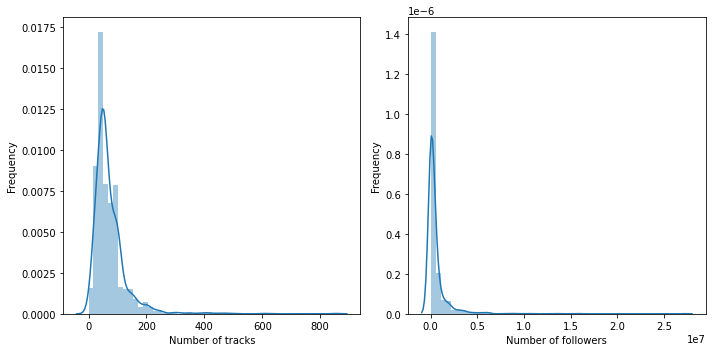

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(pd_playlists['num_tracks'].values, ax = ax[0])
sns.distplot(pd_playlists['num_followers'].values, ax = ax[1])

ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Number of tracks')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Number of followers')

fig.tight_layout()

In [112]:
fig = px.box(pd_playlists, x="num_tracks", points="all", title="Distribution of number of tracks in each playlist")
fig.show()

In [113]:
fig = px.box(pd_playlists, x="num_followers", points="all", title="Distribution of number of followers of each playlist")
fig.show()

**Nhận xét**: 
- Cả số lượng bài hát & (đặc biệt là) số lượt theo dõi đều có phân bố lệch trái 
- Số lượng bài hát của mỗi playlist tập trung ở khoảng dưới 100 bài (giá trị median khoảng 55), một số lượng vừa đủ, đảm bảo playlist không quá dài và không quá ngắn (bài toán recommend bài hát để tiếp tục playlist có thể gợi ý số bài hát ở khoảng vài chục để phù hợp với hầu hết các playlist)
- Số lượt theo dõi có sự chênh lệch rất khác biệt giữa các playlist. Trong khi hầu hết các playlist có số followers nhỏ hơn 500k, những playlist hot nhất có số lượt theo dõi cao gấp rất nhiều lần (chủ yếu gấp 15 lần), playlist nổi tiếng nhất có lượt followers hơn 27M, tức gấp hơn 54 lần những playlist thông thường!

#### Câu hỏi 2: Hãy liệt kê các tên playlist có số lượng người theo dõi nhiều nhất (thông tin này sẽ có lợi cho quá trình đề xuất bài hát)

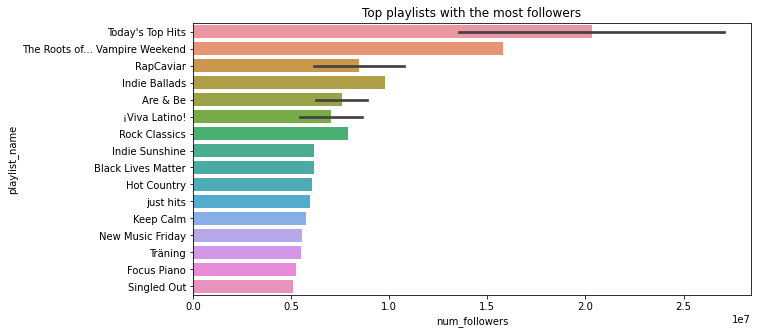

In [144]:
temp_pd = pd_playlists.sort_values(by=['num_followers'], ascending=False)
top_num = 20
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="num_followers", y="playlist_name", data=temp_pd[:top_num])
_ = ax.set_title('Top playlists with the most followers')

**Nhận xét**: 
- Ta thấy playlist có nhiều người theo dõi nhất là `Today's Top Hits`, có thể lý giải bởi gần như mọi người đều muốn cập nhật những bài hát mới và nổi tiếng nhất **theo ngày**.
- Những playlist tiếp theo nằm trong top là những playlist chia theo **thể loại nhạc** như Rap, R&B (Are & Be), Rock, ...
- Trong top những playlist này có playlist `Black Lives Matter`, thể hiện phong trào đấu tranh cho người da đen gần đây ở Mỹ. Điều này cho ta thấy rõ ràng âm nhạc là một phần rất gần gũi của cuộc sống con người, xu hướng âm nhạc phản ánh những gì đang diễn ra ngoài xã hội.

#### Câu hỏi 3: Hãy liệt kê các tên playlist có số lượng tracks nhiều nhất.

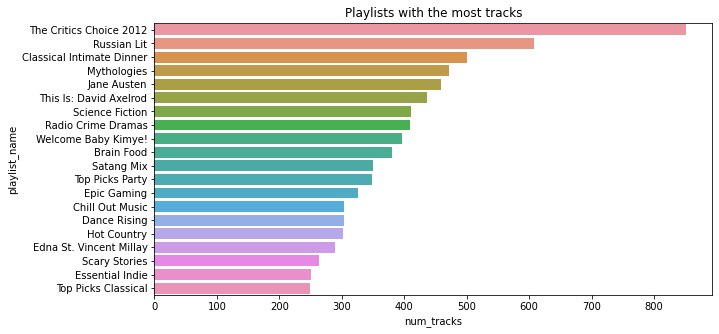

In [145]:
temp_pd = pd_playlists.sort_values(by=['num_tracks'], ascending=False)
top_num = 20
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="num_tracks", y="playlist_name", data=temp_pd[:top_num])
_ = ax.set_title('Playlists with the most tracks')

In [146]:
temp_pd.head(20)

,playlist_id,playlist_name,description,num_tracks,num_followers
1369,2fC7gpl3V9MmCc8gBPHc66,The Critics Choice 2012,None,851,21
888,37i9dQZF1DX0yHwYvqyUJQ,Russian Lit,Learn Italian with a collection of audio courses that will take you from beginner lessons and travel necessities to advanced conversations.,608,72221
912,1M2abQkxCwrLjzLGgKWnDP,Classical Intimate Dinner,"Lend some gravitas to the moment with the complete works of Vincenzo Bellini, featuring acclaimed recordings of his entire operatic oeuvre and large scale sacred choral pieces.",500,425
885,37i9dQZF1DWTJSgpZmw7H2,Mythologies,Learn French with a collection of audio courses that will take you from beginner lessons to advanced conversations and even French literature appreciation.,472,97180
878,37i9dQZF1DXc6li3e9oatQ,Jane Austen,Learn Spanish with a collection of audio courses that will take you from beginner lessons to advanced conversations – featuring essential travel phrases and vocabulary!,459,156606
336,37i9dQZF1DXb85CZUwGLzX,This Is: David Axelrod,Silly-walk your way through the entire Monty Python catalogue.,436,14257
893,37i9dQZF1DX8d1cgbQqKFy,Science Fiction,"Dive into the works of Noam Chomsky, beginning with his latest 2014 release, When Elites Fail.",410,18162
886,37i9dQZF1DWVrSKB2Pc3PY,Radio Crime Dramas,Learn German with a collection of audio courses that will take you from beginner to advanced conversations.,409,65063
626,0tkdz9yYluhlxVE9BuJOPm,Welcome Baby Kimye!,"A collection of live, exclusive performances from the most exciting artists in the world.",397,1509
129,37i9dQZF1DX6GJXiuZRisr,Brain Food,"Dark & moody progressive house <a href=""spotify:genre:edm_dance"">& electronic</a> on the late night highway.",380,1037108


**Nhận xét**: playlist có nhiều bài hát nhất là `The Critics Choice 2012`, có thể đây là playlist tập hợp những bài hát được lựa chọn để nghe trong năm 2012. Dựa vào description của các playlists, ta có thể thấy những playlist chứa nhiều tracks nhất là tập hợp những audio để học một ngôn ngữ nào đó (Italian, Chinese, German, ...) hoặc là tập hợp những công trình/tác phẩm của một tác giả nào đó, ...

#### Câu hỏi 4: Số lượng tracks của 20 playlist hot nhất 

In [147]:
top_playlist = pd_playlists.sort_values(by=['num_followers'], ascending=False).head(20)
percentage = top_playlist['num_tracks'].value_counts(normalize=True)
tmp_df = pd.DataFrame({
    'Percentage': percentage.values,
    'Number of tracks': percentage.index
})
tmp_df

,Percentage,Number of tracks
0,0.30,100
1,0.20,50
2,0.05,53
3,0.05,145
4,0.05,80
5,0.05,302
6,0.05,77
7,0.05,75
8,0.05,105
9,0.05,99


In [148]:
px.pie(tmp_df, names='Number of tracks', values='Percentage', title="Number of tracks in top playlists")

**Nhận xét**: Dựa vào bảng và biểu đồ trên, ta thấy hầu hết các top playlists có số bài hát nhỏ hơn 100 bài. Những playlist có nhiều bài hát hơn cũng chỉ có nhiều nhất khoảng 300 bài hát. Điều này phần nào thể hiện xu thế những playlist phổ biến có số lượng track không quá nhiều.

#### Câu hỏi 5: Các từ được sử dụng nhiều nhất để đặt tên playlist và mô tả playlist

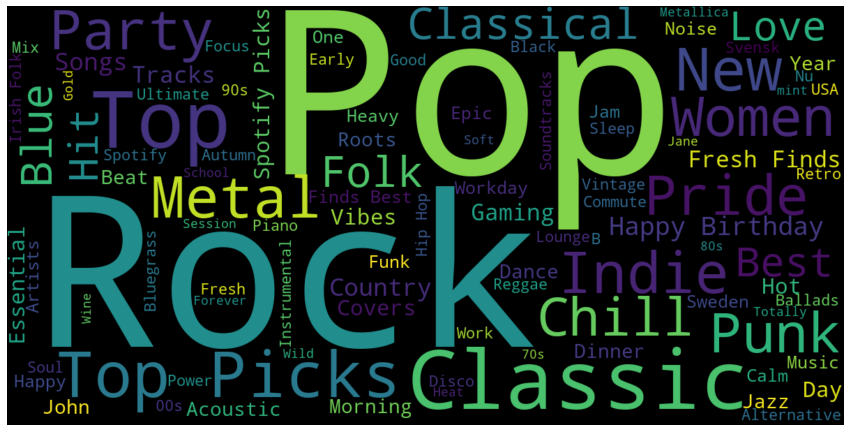

In [149]:
titles = " ".join(pd_playlists['playlist_name'])

# Create stopword list:
stopwords = set(STOPWORDS)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1200, height=600, stopwords=stopwords, max_words=100).generate(titles)

# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Nhận xét**: 
Dễ dàng nhận thấy những từ phổ biến nhất trong tên bài hát là những từ chỉ **thể loại** nhạc như *Rock, Pop, Metal, Classical, ...* hay những từ thể hiện **mục đích** của playlist như *Happy Birthday, Pride, Party, Work, Chill, ...* Những từ này được chọn vì nó thể hiện rõ ràng theme của playlist, dễ hình dung nội dung playlist khi đọc.

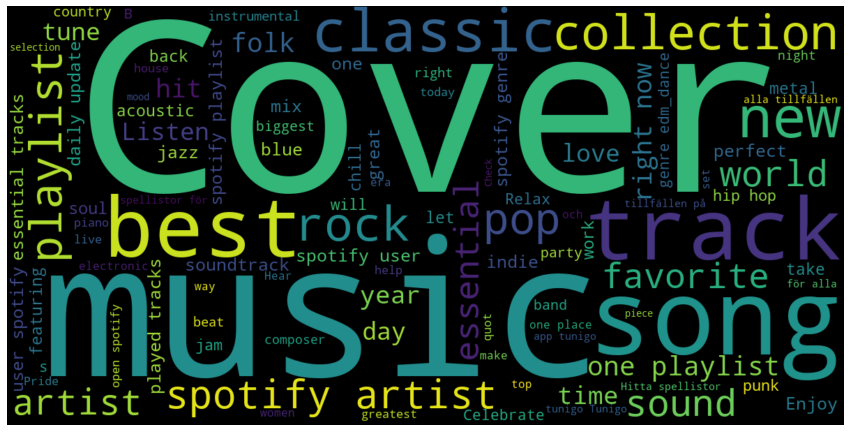

In [150]:
msk = pd_playlists['description'] != "None"
descriptions = " ".join(pd_playlists['description'][msk])

# Create stopword list:
stopwords.update(["href"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1200, height=600, stopwords=stopwords, max_words=100).generate(descriptions)

# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Nhận xét:**
Khác với những từ trong tên playlist, những từ phổ biến nhất để mô tả playlist là những từ mô tả **tập hợp, bài hát** như *collection, playlist, track, music, song* và những từ chỉ **thể loại** như *cover, rock, pop, classic, ...*

### Nhóm câu hỏi 2: Liên quan đến tác giả bài hát (artist) và album (album)

#### Câu hỏi 1: Hãy liệt kê các nghệ sĩ (artist) và album có số lượng tracks nhiều nhất. 

In [151]:
temp_df = pd_full[['artist_names']]
temp_df['artist_names'] = temp_df['artist_names'].apply(lambda x : x[1:-1].split(','))
temp_df = temp_df.explode('artist_names')

top_num = 20
temp_df = temp_df['artist_names'].value_counts()[:top_num]

<ipython-input-151-cae76385973d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



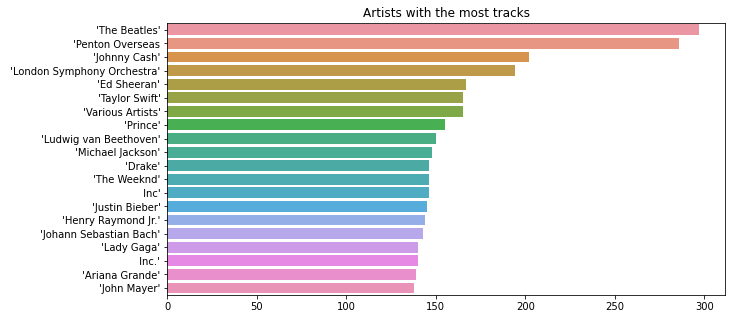

In [154]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x = temp_df.values, y= temp_df.index)
_ = ax.set_title('Artists with the most tracks')

**Nhận xét**: Những nghệ sĩ có nhiều bài hát nhất bao gồm cả những nghệ sĩ trẻ (Talor Swift, Ed Sheeran, ...), những nghệ sĩ lâu năm (The Beatles, Johnny Cash), công ty phát hành sách (Penton Overseas), nhà soạn nhạc (Beethoven). Đây đều là những tên tuổi hàng đầu được nhiều người biết đến.

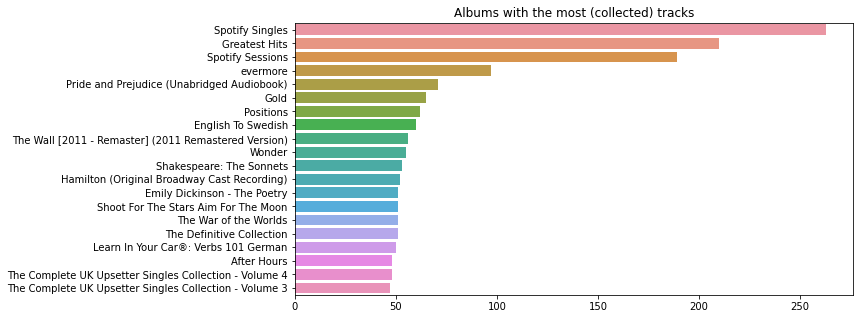

In [156]:
temp_df = pd_full[['album_name']]
top_num = 20
temp_df = temp_df['album_name'].value_counts()[:top_num]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x = temp_df.values, y= temp_df.index)
_ = ax.set_title('Albums with the most (collected) tracks')

### Nhóm câu hỏi 3: Liên quan đến các bài hát.

#### Câu hỏi 0: Bài hát nào xuất hiện trong nhiều playlist nhất?

In [212]:
id_to_name = dict(zip(pd_full['track_id'], pd_full['track_name']))
id_to_artist = dict(zip(pd_full['track_id'], pd_full['artist_names']))
most_freq_ids = pd_full['track_id'].value_counts().head(10)
tmp_df = pd.DataFrame({
    'track_id': most_freq_ids.index,
    'track_name': [id_to_name[idx] for idx in most_freq_ids.index],
    'frequency': most_freq_ids.values,
    'artists': [id_to_artist[idx] for idx in most_freq_ids.index]
})
tmp_df

,track_id,track_name,frequency,artists
0,54bFM56PmE4YLRnqpW6Tha,Therefore I Am,37,['Billie Eilish']
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,36,['The Weeknd']
2,6zFMeegAMYQo0mt8rXtrli,HOLIDAY,33,['Lil Nas X']
3,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),31,"['24kGoldn', 'iann dior']"
4,45bE4HXI0AwGZXfZtMp8JR,you broke me first,27,['Tate McRae']
5,5vGLcdRuSbUhD8ScwsGSdA,Whoopty,27,['CJ']
6,1tkg4EHVoqnhR6iFEXb60y,What You Know Bout Love,26,['Pop Smoke']
7,4y4spB9m0Q6026KfkAvy9Q,Lonely (with benny blanco),26,"['Justin Bieber', 'benny blanco']"
8,0lizgQ7Qw35od7CYaoMBZb,Santa Tell Me,26,['Ariana Grande']
9,7hxHWCCAIIxFLCzvDgnQHX,"Lemonade (feat. Gunna, Don Toliver & NAV)",26,"['Internet Money', 'Gunna', 'Don Toliver', 'NAV']"


**Nhận xét:** những bài hát ở trên đều là những bài hát *mới* và *phổ biến*, đến từ những nghệ sĩ *nổi tiếng*. Có thể đây là lý do chúng được thêm vào nhiều playlists khác nhau.

#### Câu hỏi 1: Thời lượng của các bài hát được phân bố như thế nào?

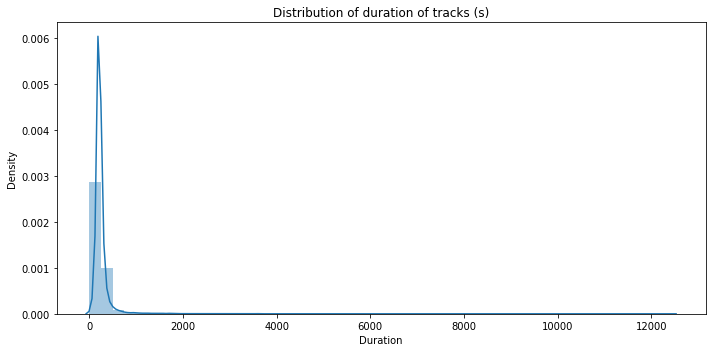

In [179]:
fig, ax = plt.subplots(figsize=(10, 5))
duration = pd_full['track_duration_ms'] / 1000
sns.distplot(duration.values, ax = ax)

ax.set_title('Distribution of duration of tracks (s)')

ax.set_ylabel('Density')
ax.set_xlabel('Duration')

fig.tight_layout()

In [165]:
duration.describe()

count    86350.000000
mean       254.086963
std        226.711725
min          4.000000
25%        181.050500
50%        216.000000
75%        261.853000
max      12456.045000
Name: track_duration_ms, dtype: float64

**Nhận xét**:
Ta thấy hầu hết các bài hát đều có độ dài dưới 250s (khoảng 4p)

#### Câu hỏi 2: Các thuộc tính liên quan đến tâm trạng bài hát (Danceability, Valence, Energy, Tempo) được phân bố như thế nào?

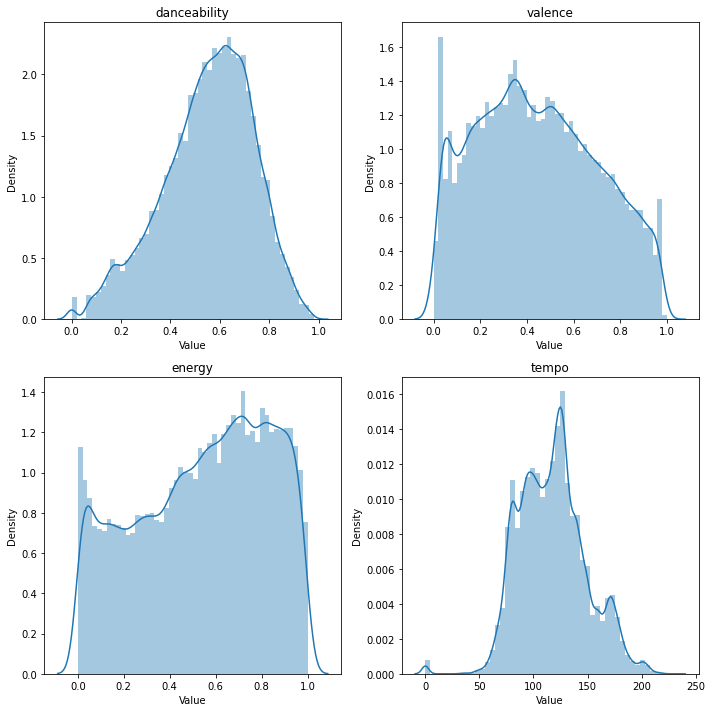

In [178]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.distplot(pd_full['danceability'].values, ax = ax[0][0])
sns.distplot(pd_full['valence'].values, ax = ax[0][1])
sns.distplot(pd_full['energy'].values, ax = ax[1][0])
sns.distplot(pd_full['tempo'].values, ax = ax[1][1])

ax[0][0].set_title('danceability')
ax[0][1].set_title('valence')
ax[1][0].set_title('energy')
ax[1][1].set_title('tempo')

for i in range(2):
    for j in range(2):
        ax[i][j].set_ylabel('Density')
        ax[i][j].set_xlabel('Value')

fig.tight_layout()

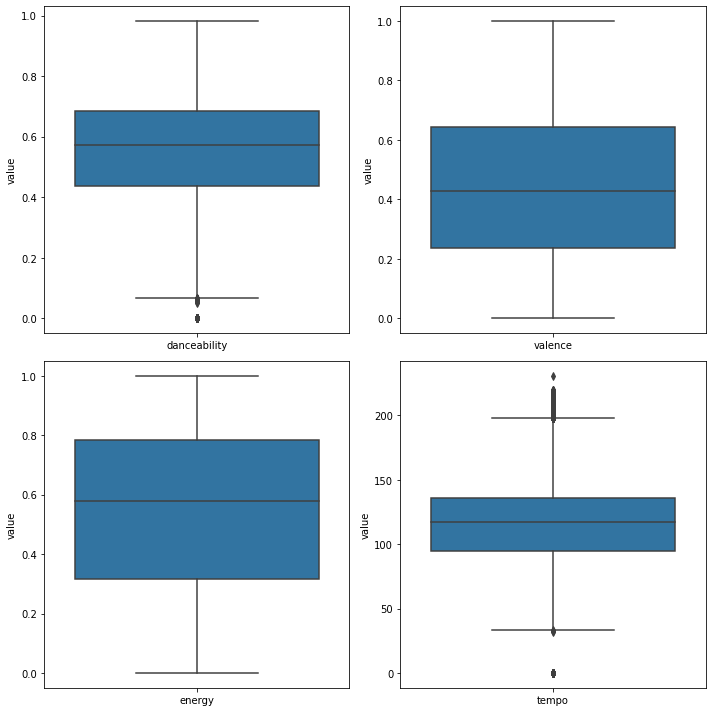

In [183]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(data=pd_full[['danceability']], ax = ax[0][0])
sns.boxplot(data=pd_full[['valence']], ax = ax[0][1])
sns.boxplot(data=pd_full[['energy']], ax = ax[1][0])
sns.boxplot(data=pd_full[['tempo']], ax = ax[1][1])

for i in range(2):
    for j in range(2):
        ax[i][j].set_ylabel('value')

fig.tight_layout()

**Nhận xét**:
- Chỉ có thuộc tính `danceability` có phân bố gần chuẩn, các thuộc tính khác `valence`, `energy`, `tempo` có distribution phức tạp với nhiều modes 
- Thuộc tính `tempo` có scale lớn hơn nhiều so với các thuộc tính còn lại, nên cần chú ý trong quá trình xây dựng mô hình
- Cả 4 thuộc tính trên đều có các giá trị nằm rải rác trong miền giá trị của chúng, thể hiện sự đa dạng và phân bố khá liên tục của các bài hát.

#### Câu hỏi 3: Các thuộc tính liên quan đến đặc điểm bài hát (Loudness, Speechiness, Instrumentalness) được phân bố như thế nào?

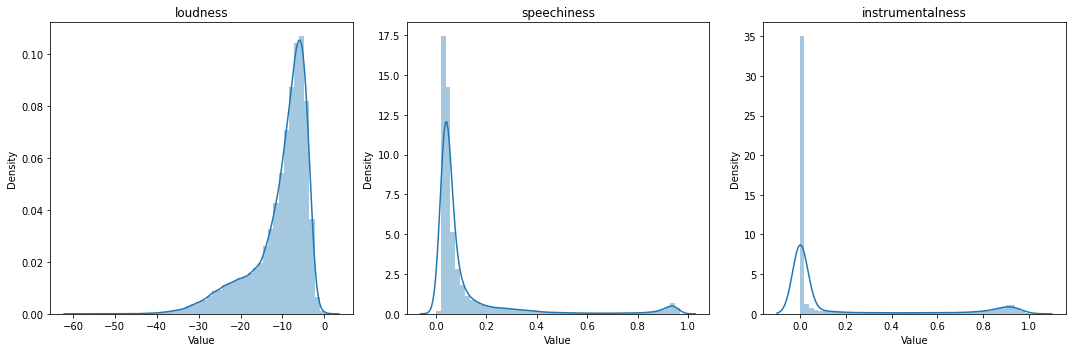

In [191]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(pd_full['loudness'].values, ax = axes[0])
sns.distplot(pd_full['speechiness'].values, ax = axes[1])
sns.distplot(pd_full['instrumentalness'].values, ax = axes[2])

axes[0].set_title('loudness')
axes[1].set_title('speechiness')
axes[2].set_title('instrumentalness')

for i in range(3):
    axes[i].set_ylabel('Density')
    axes[i].set_xlabel('Value')

fig.tight_layout()

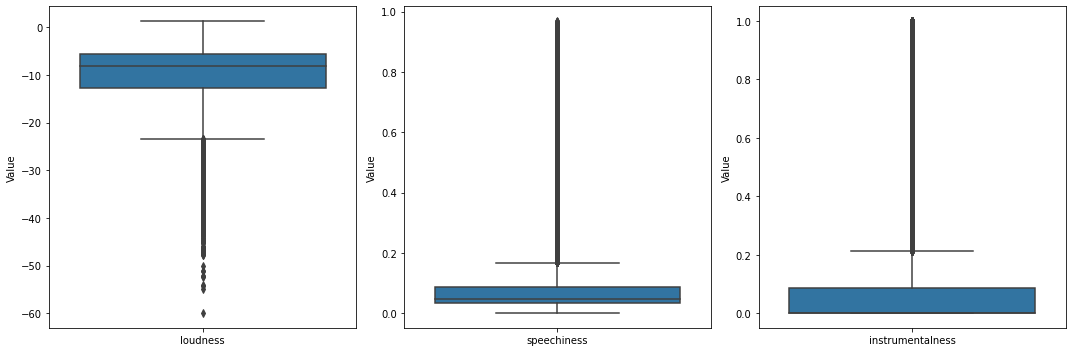

In [190]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=pd_full[['loudness']], ax = axes[0])
sns.boxplot(data=pd_full[['speechiness']], ax = axes[1])
sns.boxplot(data=pd_full[['instrumentalness']], ax = axes[2])

for i in range(3):
    axes[i].set_ylabel('Value')

fig.tight_layout()

**Nhận xét:**
- Ta nhận thấy chỉ có thuộc tính `loudness` là có phân bố khá liên tục, các điểm dữ liệu không quá tập trung tại một vùng nào đó.
- Khác với các thuộc tính ở trên, `speechiness` và `instrumentalness` có distribution với 2 cụm điểm tách biệt. Điều này phù hợp với ý nghĩa của các trường này: *speechiness* thể hiện một track là bài hát hay bài diễn thuyết, *instrumentalness* thể hiện một track có lời hay không lời. Mặc dù đây là 2 biến liên tục nhưng trong quá trình xây dựng mô hình, ta có thể xét ngưỡng để biến 2 biến này thành dạng rời rạc.

#### Câu hỏi 4: Các thuộc tính liên quan đến nội dung bài hát (Liveness, Acousticness) được phân bố như thế nào?

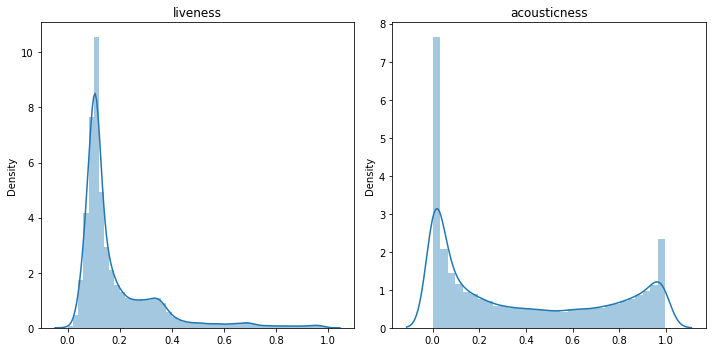

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(pd_full['liveness'].values, ax = ax[0])
sns.distplot(pd_full['acousticness'].values, ax = ax[1])

ax[0].set_title('liveness')
ax[1].set_title('acousticness')

for i in range(2):
    ax[i].set_ylabel('Density')

fig.tight_layout()

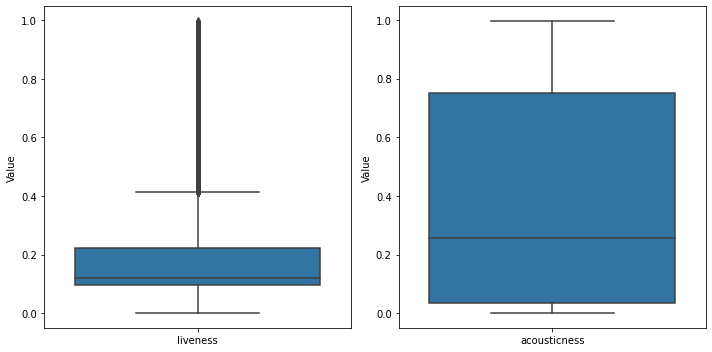

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=pd_full[['liveness']], ax = ax[0])
sns.boxplot(data=pd_full[['acousticness']], ax = ax[1])

for i in range(2):
    ax[i].set_ylabel('Value')

fig.tight_layout()

**Nhận xét**:
- Thuộc tính `liveness` có phân bố tập trung hơn so với thuộc tính `acousticness`
- `acousticness` có distribution với 2 mode 0 và 1, có lẽ phản ánh sự tách biệt giữa những bài hát thu âm và những bài hát được hát theo phong cách acoustic.

#### Câu hỏi 5: Tương quan giữa các thuộc tính trên (Danceability, Valence, Energy, Tempo, Loudness, Speechiness, Instrumentalness, Liveness, Acousticness, Duration) là như thế nào?

In [195]:
temp_df = pd_full[['track_duration_ms', 'liveness', 'acousticness', 'loudness', 'speechiness', 'instrumentalness', 'danceability', 'valence', 'energy', 'tempo']]

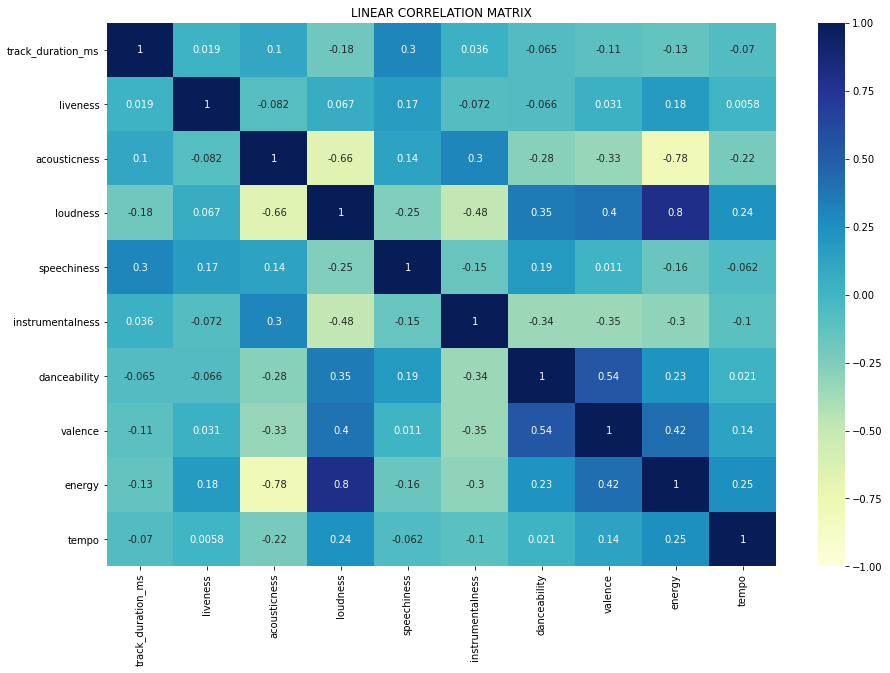

In [196]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(temp_df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()

**Nhận xét**: dựa vào heatmap trên, ta có thể đưa ra một vài nhận xét về tương quan giữa các biến:
- `valence`, `danceability` và `energy` có mối tương quan dương (khá hợp lý vì đây là các thuộc tính thể hiện tính "nhún nhảy", tích cực và năng lượng của một bài hát)
- `track_duration_ms` và `speechiness` có mối tương quan dương (0.3). Điều này có thể giải thích như sau: bài nói/thuyết trình (có speechiness lớn) thường dài hơn những bài hát thông thường.
- `acousticness` có mối tương quan âm với `loudness` và `energy`: những bài hát acoustic thường không quá lớn tiếng và mang tính thư giãn, cảm nhận nhiều hơn
- `loudness` và `energy` có mối tương quan dương: một bài hát càng có cường độ lớn thường sẽ mang nhiều năng lượng 
- `instrumentalness` và `loudness` có tương quan âm: bài hát không lời (có instrumentalness lớn) thường sẽ nhẹ nhàng